In [1]:
# import the ml library
import pandas as pd
from sklearn import metrics

In [2]:
# input data set

income = [60, 85.5, 64.8, 61.5, 87, 110.1, 108, 82.8, 69, 93, 51, 81, 75, 52.8, 64.8, 43.2, 84, 49.2, 59.4, 66, 47.4, 33, 51, 63]
plot_size = [18.4, 16.8, 21.6, 20.8, 23.6, 19.2, 17.6, 22.4, 20, 20.8, 22, 20, 19.6, 20.8, 17.2, 20.4, 17.6, 17.6, 16, 18.4, 16.4, 18.8, 14, 14.8 ]
owner = ['owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner', 'non-owner']

#input_data = pd.DataFrame.from_items({'income' : income, 'plot_size' : plot_size, 'owner' : owner})
input_data = pd.DataFrame.from_items([('income', income) , ('plot_size', plot_size) ,('owner', owner)])

In [3]:
input_data

,income,plot_size,owner
0,60.0,18.4,owner
1,85.5,16.8,owner
2,64.8,21.6,owner
3,61.5,20.8,owner
4,87.0,23.6,owner
5,110.1,19.2,owner
6,108.0,17.6,owner
7,82.8,22.4,owner
8,69.0,20.0,owner
9,93.0,20.8,owner


In [3]:
# seperate the predictors x and response y
x = input_data[['income', 'plot_size']]
y = input_data['owner']

In [5]:
x.head()

,income,plot_size
0,60.0,18.4
1,85.5,16.8
2,64.8,21.6
3,61.5,20.8
4,87.0,23.6


In [6]:
y.head()

0    owner
1    owner
2    owner
3    owner
4    owner
Name: owner, dtype: object

In [5]:
from sklearn import tree
ctree = tree.DecisionTreeClassifier()
ctree_model = ctree.fit(x, y)

In [7]:
ctree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

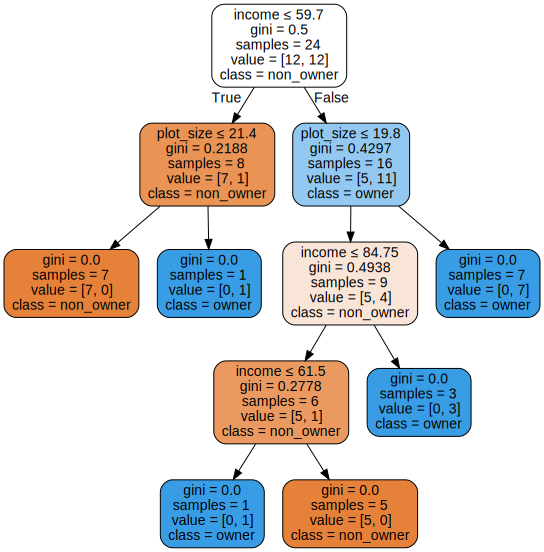

In [6]:
import graphviz
tree_data = tree.export_graphviz(ctree_model, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['non_owner', 'owner'],
                                 filled=True,
                                 rounded=True, 
                                 special_characters=True
                                 )
graph = graphviz.Source(tree_data)
graph

In [12]:
# Training accuracy
y_pred = ctree_model.predict(x)
print(metrics.accuracy_score(y, y_pred))

1.0


In [13]:
# comparison of predictive vs Actual in complete data

comparision_df = pd.DataFrame()

comparision_df['actual'] = y
comparision_df['predicted'] = y_pred

comparision_df

,actual,predicted
0,owner,owner
1,owner,owner
2,owner,owner
3,owner,owner
4,owner,owner
5,owner,owner
6,owner,owner
7,owner,owner
8,owner,owner
9,owner,owner


In [9]:
#1: Import the model class that is gong to be used - Classification Tree
from sklearn import tree

In [10]:
#2: Create the instance of the Model Estimator (instantiate the model)
ctree = tree.DecisionTreeClassifier()

In [12]:
ctree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
#3 split the whole data into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=8)

In [29]:
#4: train the model based on training data to learn the pattern from historical data
ctree_model = ctree.fit(x_train, y_train)

In [30]:
ctree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
import graphviz

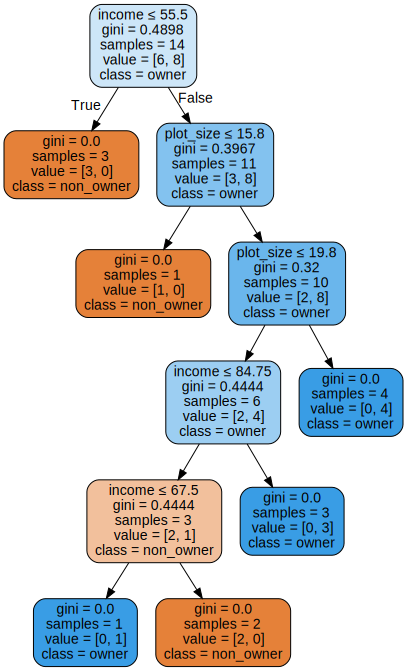

In [17]:
tree_data = tree.export_graphviz(ctree_model, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['non_owner', 'owner'],
                                 filled=True,
                                 rounded=True, 
                                 special_characters=True
                                 )
graph = graphviz.Source(tree_data)
graph

In [18]:
# Training accuracy
y_train_pred = ctree_model.predict(x_train)
print(metrics.accuracy_score(y_train, y_train_pred))

1.0


In [19]:
x_test

,income,plot_size
13,52.8,20.8
18,59.4,16.0
3,61.5,20.8
14,64.8,17.2
20,47.4,16.4
17,49.2,17.6
10,51.0,22.0
4,87.0,23.6
2,64.8,21.6
19,66.0,18.4


In [20]:
y_test

13    non-owner
18    non-owner
3         owner
14    non-owner
20    non-owner
17    non-owner
10        owner
4         owner
2         owner
19    non-owner
Name: owner, dtype: object

In [31]:
# Testing accuracy
y_test_pred = ctree_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_test_pred))

0.8


In [22]:
print(y_test)

13    non-owner
18    non-owner
3         owner
14    non-owner
20    non-owner
17    non-owner
10        owner
4         owner
2         owner
19    non-owner
Name: owner, dtype: object


In [23]:
# comparison of predictive vs Actual in test data

comparision_df = pd.DataFrame()

comparision_df['actual'] = y_test
comparision_df['predicted'] = y_test_pred

comparision_df

,actual,predicted
13,non-owner,non-owner
18,non-owner,owner
3,owner,owner
14,non-owner,owner
20,non-owner,non-owner
17,non-owner,non-owner
10,owner,non-owner
4,owner,owner
2,owner,owner
19,non-owner,owner


In [32]:
# Model Tuning to improve the model predictive performance on test data
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [1, 2 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [2, 3],
               "min_samples_leaf"  : [ 2, 3]
                
                }


In [35]:
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv = 5)

In [36]:
optimized_tree.fit(x_train, y_train)
#optimized_tree.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1, 2], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3], 'min_samples_leaf': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [39]:
optimized_tree.best_score_

0.7142857142857143

In [38]:
optimized_tree.best_params_

{'criterion': 'gini',
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
optimized_tree.best_estimator_

In [37]:
optimized_tree.grid_scores_
#optimized_tree.cv_results_

C:\Users\jp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50000, std: 0.26667, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'},
 mean: 0.57143, std: 0.08165, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'},
 mean: 0.42857, std: 0.14530, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'},
 mean: 0.57143, std: 0.08165, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'random'},
 mean: 0.71429, std: 0.20000, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'},
 mean: 0.50000, std: 0.15275, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'},
 mean: 0.71429, std: 0.20000, params: {'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 3, 'min_sampl

In [ ]:
best_parms = optimized_tree.best_params_
best_parms

In [ ]:
ctree_final = tree.DecisionTreeClassifier(criterion = 'gini', max_features = 2, min_samples_leaf = 2, min_samples_split = 3, 
                                          splitter = 'random')

In [41]:
# test accuracy for differrent random samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

ctree_final = tree.DecisionTreeClassifier(criterion = 'gini', max_features = 2, min_samples_leaf = 2, min_samples_split = 2, splitter = 'random')
model_f = ctree_final.fit(x_train, y_train)

y_pred = model_f.predict(x_test)
metrics.accuracy_score(y_pred, y_test) # test accuracy

0.69999999999999996

In [42]:
# Cross Validaiton Accuracy of classification tree
from sklearn.model_selection import cross_val_score
ctree_final = tree.DecisionTreeClassifier(criterion = 'gini', max_features = 2, min_samples_leaf = 2, min_samples_split = 3, splitter = 'random')
cv_scores = cross_val_score(ctree_final, x, y, cv=10, scoring='accuracy')
cv_scores

array([ 0. ,  0.5,  1. ,  1. ,  1. ,  1. ,  0.5,  1. ,  0.5,  1. ])

In [43]:
cv_scores.mean()

0.75

In [44]:
# Predict some new data
ctree_model.predict([[60, 20]])

array(['owner'], dtype=object)